# **Assignment 1: Statisitical Interpretation and exploratory data Analysis.**

# **Problem 1: Getting Started with data exploration.**

**1. Data exploration and understanding**

1. Load the dataset and display the first 10 rows.

In [ ]:
import pandas as pd #panda is python library, data manipulation, analysis, to manage.
from google.colab import drive
drive.mount('/content/drive') # to mount in directory
file = pd.read_csv('/content/drive/MyDrive/A.I./WHR-2024-5CS037.csv') # converts into pandas DataFramework, to work with data in python
print(file.head(10)) # prints 10 head of file

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
3       Sweden  7.344               1.878           1.501   
4       Israel  7.341               1.803           1.513   
5  Netherlands  7.319               1.901           1.462   
6       Norway  7.302               1.952           1.517   
7   Luxembourg  7.122               2.141           1.355   
8  Switzerland  7.060               1.970           1.425   
9    Australia  7.057               1.854           1.461   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.82

2. Identify the number of rows and columns in the dataset.

In [ ]:
print(file.shape)  # to identify the number of rows and columns in the dataset.

(143, 9)


3. List all the columns and their data types.

In [ ]:
print(file.dtypes) # to identify the columns and thier data types

Country name                     object
score                           float64
Log GDP per capita              float64
Social support                  float64
Healthy life expectancy         float64
Freedom to make life choices    float64
Generosity                      float64
Perceptions of corruption       float64
Dystopia + residual             float64
dtype: object


**Basic Statistics**

Calculate the mean, median, and standard deviation for the score column.

In [ ]:
mean = file['score'].mean() # to calculate mean
median = file['score'].median() # to calculate median
st_deviation = file['score'].std() # to calculate standard deviation

print(f"The mean of column score is: {mean}")
print(f"The median of column score: {median}")
print(f"The standard Deviation of column score: {st_deviation}")

The mean of column score is: 5.52758041958042
The median of column score: 5.785
The standard Deviation of column score: 1.1707165099442995


Identify the country with highest and lowest happiness scores.

In [ ]:
# loc means to locate data according to condition. idxmax() gives condition to print highest score column and it's data.
# idxmax(), returns maximum value from row
# .loc helps to access the group of columns and rows. then, prints the column of value returned by idxmax()
highest_score_country = file.loc[file['score'].idxmax()]

# here is same but with lowest
lowest_score_country = file.loc[file['score'].idxmin()]

print(f"The country with the highest happiness score is:\n{highest_score_country}")
print(f"The country with the lowest happiness score is:\n{lowest_score_country}")

# prints extra information in default by pandas

The country with the highest happiness score is:
Country name                    Finland
score                             7.741
Log GDP per capita                1.844
Social support                    1.572
Healthy life expectancy           0.695
Freedom to make life choices      0.859
Generosity                        0.142
Perceptions of corruption         0.546
Dystopia + residual               2.082
Name: 0, dtype: object
The country with the lowest happiness score is:
Country name                    Afghanistan
score                                 1.721
Log GDP per capita                    0.628
Social support                          0.0
Healthy life expectancy               0.242
Freedom to make life choices            0.0
Generosity                            0.091
Perceptions of corruption             0.088
Dystopia + residual                   0.672
Name: 142, dtype: object


**Missing Values**

Check if there are any missing values in the dataset. if, so display the total count for each column.

In [ ]:
missing_values = file.isnull().sum() # isnull gives booleen value true if value is missing or otherwise.
# .sum(), it sums the true value, true is recognized as 1 and it sums up the value and gives final result
print(missing_values)

Country name                    0
score                           0
Log GDP per capita              3
Social support                  3
Healthy life expectancy         3
Freedom to make life choices    3
Generosity                      3
Perceptions of corruption       3
Dystopia + residual             3
dtype: int64


**Filter and sorting**

Filter the dataset to show only the countries with a score greater than 7.5

In [ ]:
# why two file? -> one for dataframe to work with, another to apply condition
filtered_data = file[file['score'] > 7.5]
print(filtered_data)

  Country name  score  Log GDP per capita  Social support  \
0      Finland  7.741               1.844           1.572   
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.695                         0.859       0.142   
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   

   Perceptions of corruption  Dystopia + residual  
0                      0.546                2.082  
1                      0.548                1.881  
2                      0.182                2.050  


For the filtered dataset - sort the dataset by GDP per capita in descending order and display top 10 rows.

In [ ]:
# sort_values, sorts according to Log GdP per capita where, ascending false gives booleen value to print highest to lowest
sorted_data = filtered_data.sort_values(by='Log GDP per capita', ascending=False)
print(sorted_data.head(10))

  Country name  score  Log GDP per capita  Social support  \
1      Denmark  7.583               1.908           1.520   
2      Iceland  7.525               1.881           1.617   
0      Finland  7.741               1.844           1.572   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
1                    0.699                         0.823       0.204   
2                    0.718                         0.819       0.258   
0                    0.695                         0.859       0.142   

   Perceptions of corruption  Dystopia + residual  
1                      0.548                1.881  
2                      0.182                2.050  
0                      0.546                2.082  


**Adding new column**

Create a new column called Happiness Category that categorizes countries into three categories
based on their Score:

Low − (Score < 4)
Medium − (4 ≤ Score ≤ 6)
High − (Score > 6)

In [ ]:
def categorize_happiness(score):
  if score < 4:
    return 'Low'
  elif 4 <= score <= 6:
    return 'Medium'
  else:
    return 'High'
# the function interprets the score value and passes score in function one by one as argument.
file['Happiness Category'] = file['score'].apply(categorize_happiness) # apply calls the function to assign each individual value in score
print(file.head(144))

         Country name  score  Log GDP per capita  Social support  \
0             Finland  7.741               1.844           1.572   
1             Denmark  7.583               1.908           1.520   
2             Iceland  7.525               1.881           1.617   
3              Sweden  7.344               1.878           1.501   
4              Israel  7.341               1.803           1.513   
..                ...    ...                 ...             ...   
138  Congo (Kinshasa)  3.295               0.534           0.665   
139      Sierra Leone  3.245               0.654           0.566   
140           Lesotho  3.186               0.771           0.851   
141           Lebanon  2.707               1.377           0.577   
142       Afghanistan  1.721               0.628           0.000   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
0                      0.695                         0.859       0.142   
1                      0.699       

**Data Visualization**

Bar plot: Plot the top 10 happiest countries by Score using a bar chart.

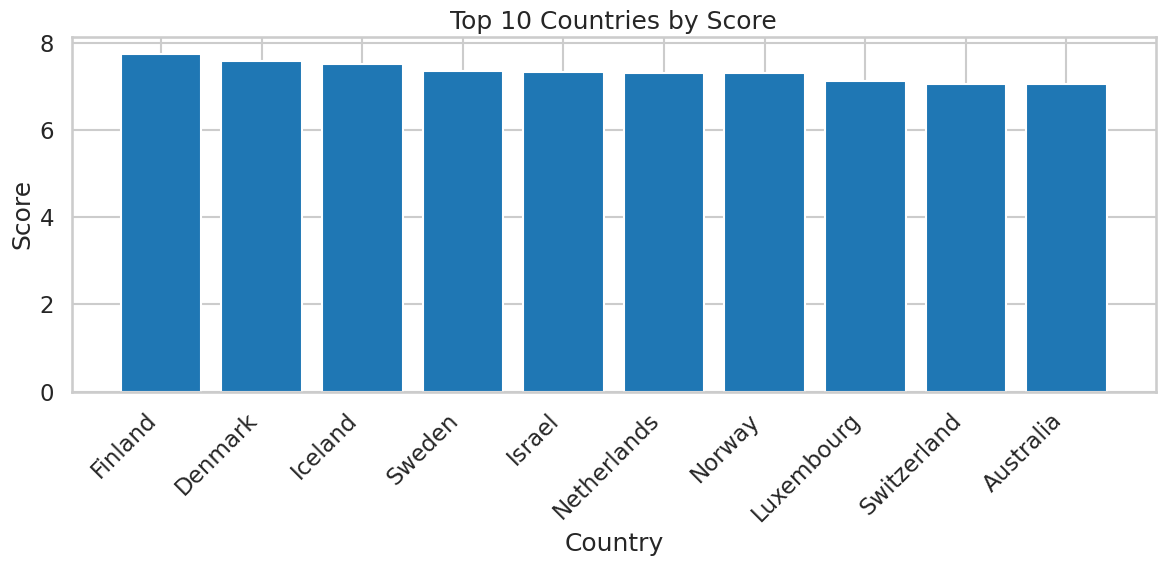

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


# sorts values of score with top 10, where it goes highest to lowest
happiest_countries = file.sort_values(by='score', ascending=False).head(10)

# to create the bar plot
plt.figure(figsize=(12, 6)) # takes tuple of 2 values to create a figure in size width, height
# takes two argument to create a bar chart where first is x axis and another is y axis
plt.bar(happiest_countries['Country name'], happiest_countries['score'])
# to label country in x axis
plt.xlabel('Country')
# to label Score in y axis
plt.ylabel('Score')
# gives title
plt.title('Top 10 Countries by Score')
# to avoid overlapping rotation of x-axis labels
# ha stands for horizantal alignment
plt.xticks(rotation=45, ha='right')
# automatically adjusts the position
plt.tight_layout()
#display the plot
plt.show()


Line plot: Plot the top 10 unhappiest countries by score using a line chart.

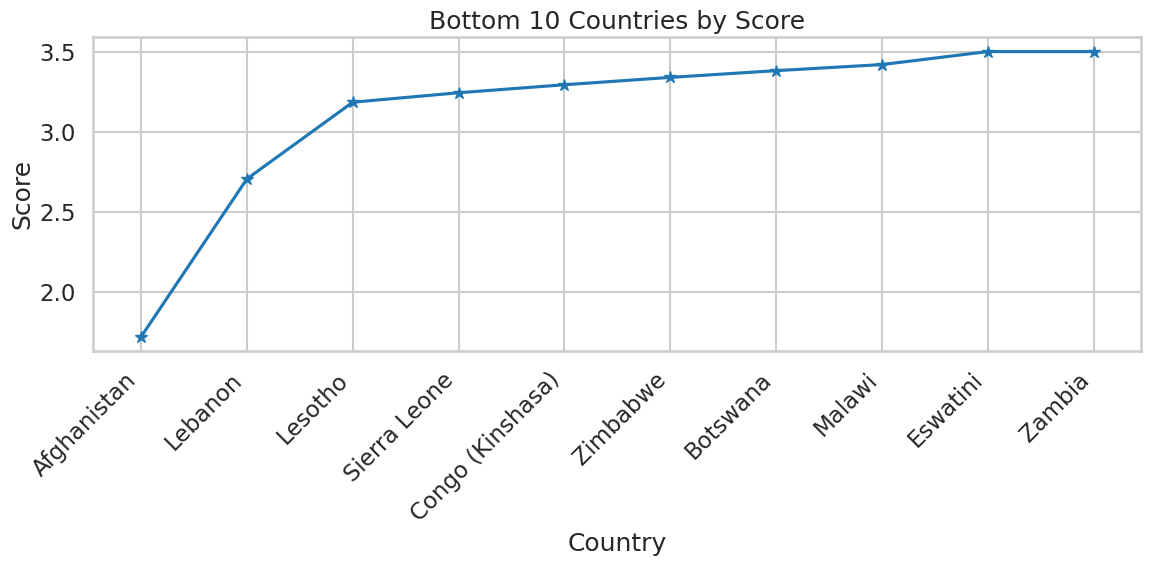

In [ ]:
# Sort the DataFrame by 'score' in ascending order to get the unhappiest countries
unhappiest_countries = file.sort_values(by='score', ascending=True).head(10)

# Create the line plot
plt.figure(figsize=(12, 6))
plt.plot(unhappiest_countries['Country name'], unhappiest_countries['score'], marker='*', linestyle='-')  # Added marker and linestyle

plt.xlabel('Country')
plt.ylabel('Score')
plt.title('Bottom 10 Countries by Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Plot a histogram for the score column to show its distribution and also interpret.

<Axes: xlabel='score', ylabel='Count'>

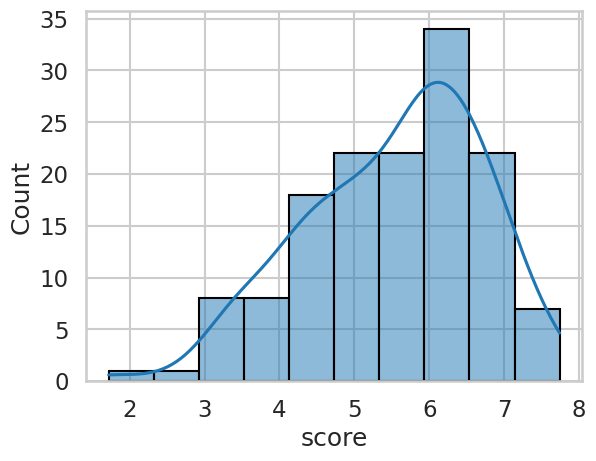

In [ ]:
import seaborn as sns


# in sns histoplot we can assign only one variable but it doesn't mean on all.
# bins means value difference
# kde makes a line appear
sns.histplot(data=file, x='score', bins=10, kde=True, edgecolor='black')


The given histogram is about happiness score in x axis and frequency on y-axis.
This is right-skewed histogram as the peak is in right with value 6. The peak mode is near 6 meaning most countries have happiness close to this value. The range is from 2 to 8 and most lies in 4-7. The kde shows the concentration of scores around 6. The outliers have extreme low scores (2-3)and extreme high scores (above 7.5)


Scatter plot: Plot a scatter plot between GDP per capita and Score to visualize their relationship.

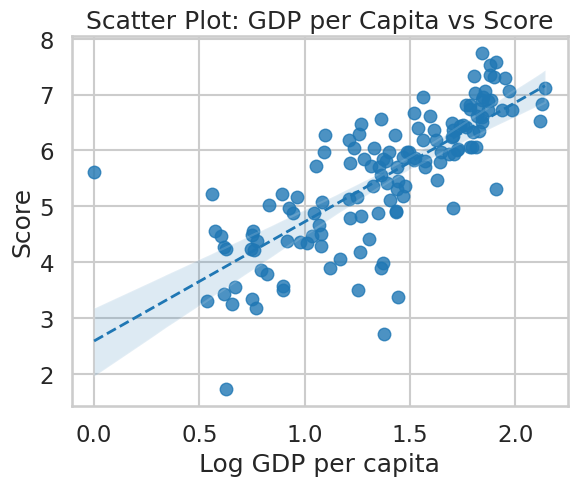

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(file, x='Log GDP per capita', y='score',  scatter=True, line_kws={'linewidth': 2, 'linestyle': '--'} )
plt.xlabel('Log GDP per capita')
plt.ylabel('Score')
plt.title('Scatter Plot: GDP per Capita vs Score')
plt.show()

# **Problem-2: Some advance data exploration task**

**Task-1-Setup task-Preparing the south-Asia dataset.**

1. Define the countries in South Asia with a list for example:
south asian countries = ["Afghanistan", "Bangladesh", "Bhutan", "India","Maldives", "Nepal", "Pakistan", "Srilanka"]
2. Use the list from step - 1 to filtered the dataset {i.e. filtered out matching dataset from list.}
3. Save the filtered dataframe as separate CSV files for future use.

In [ ]:
south_asian_countries = ["Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Sri Lanka"]
# in data file, isin checks if the given argument list are found or not. takes all at once and return true or false.
# to reduce a warining sign. and to ensure we are working with duplicate data
south_asian_countries_data = file[file['Country name'].isin(south_asian_countries)].copy()
# converts into csv file and stores in directory
south_asian_countries_data.to_csv('/content/drive/MyDrive/A.I./south_asian_countries_data.csv', index=False)
# to check
print("Your CSV file is printed.")

Your CSV file is printed.


**Task-2-Composite Score Ranking.**

1. Using the SouthAsia DataFrame, create a new column called Composite Score that combines the
following metrics:

Composite Score = 0.40 × GDP per Capita + 0.30 × Social Support + 0.30 × Healthy Life Expectancy

In [ ]:
# directly creates a column but checks if same named column exist or not, if not creates, if yes, updates
south_asian_countries_data['Composite Score'] = 0.40 * south_asian_countries_data['Log GDP per capita'] + 0.30 * south_asian_countries_data['Social support'] + 0.30 * south_asian_countries_data['Healthy life expectancy']
print(south_asian_countries_data)

    Country name  score  Log GDP per capita  Social support  \
92         Nepal  5.158               0.965           0.990   
107     Pakistan  4.657               1.069           0.600   
125        India  4.054               1.166           0.653   
127    Sri Lanka  3.898               1.361           1.179   
128   Bangladesh  3.886               1.122           0.249   
142  Afghanistan  1.721               0.628           0.000   

     Healthy life expectancy  Freedom to make life choices  Generosity  \
92                     0.443                         0.653       0.209   
107                    0.321                         0.542       0.144   
125                    0.417                         0.767       0.174   
127                    0.586                         0.583       0.144   
128                    0.513                         0.775       0.140   
142                    0.242                         0.000       0.091   

     Perceptions of corruption  Dystopi

2. Rank the South Asian countries based on the Composite Score in descending order.

In [ ]:
ranked_countries = south_asian_countries_data.sort_values(by='Composite Score', ascending=False)

print(ranked_countries[['Country name', 'Composite Score']])

    Country name  Composite Score
127    Sri Lanka           1.0739
92         Nepal           0.8159
125        India           0.7874
107     Pakistan           0.7039
128   Bangladesh           0.6774
142  Afghanistan           0.3238


3. Visualize the top 5 countries using a horizontal bar chart showing the Composite Score.

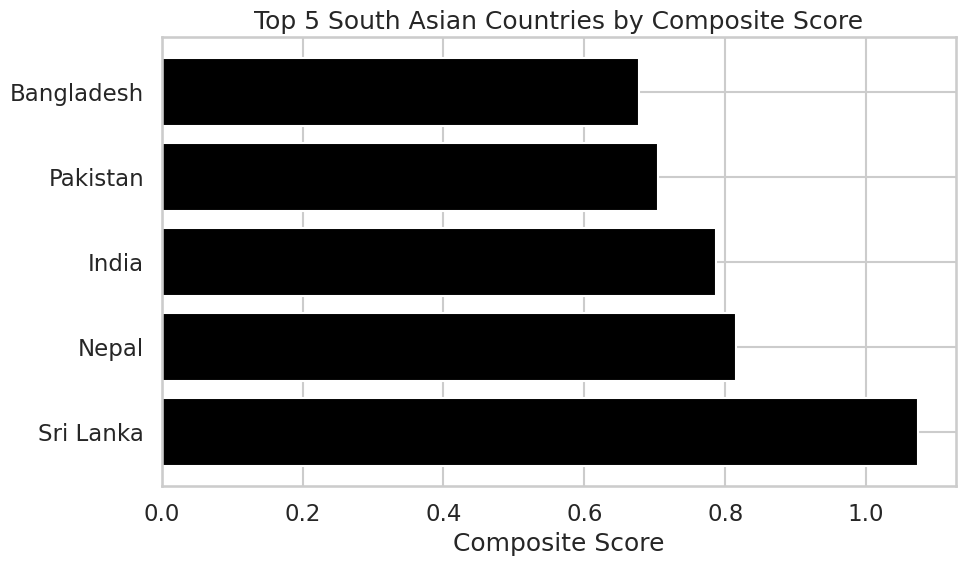

In [ ]:
import matplotlib.pyplot as plt

top5_countries = ranked_countries.head(5)

plt.figure(figsize=(10, 6))
plt.barh(top5_countries['Country name'], top5_countries['Composite Score'], color='black')
plt.xlabel('Composite Score')
plt.title('Top 5 South Asian Countries by Composite Score')
plt.tight_layout()
plt.show()

4. Discuss whether the rankings based on the Composite Score align with the original Score - support your
discussion with some visualization plot.

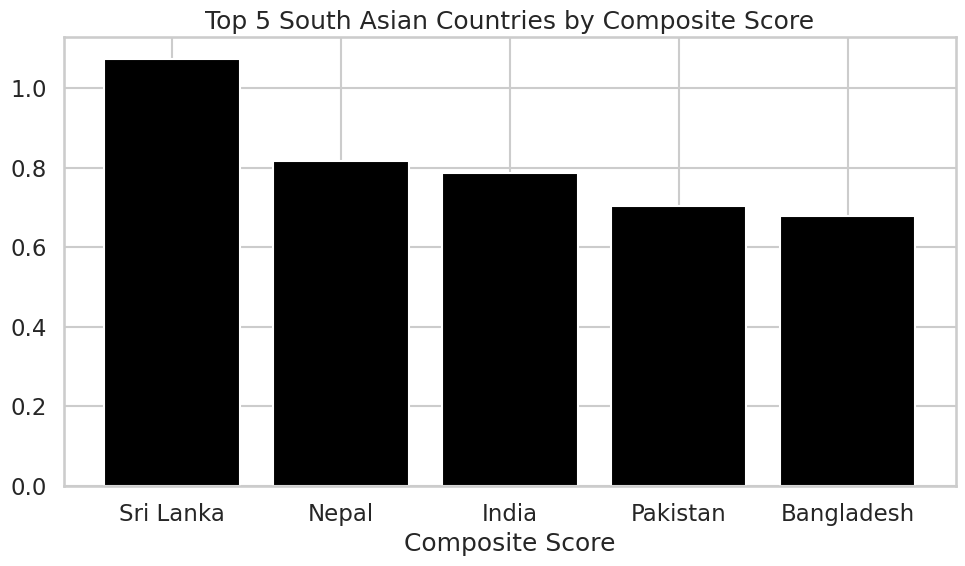

In [ ]:
import matplotlib.pyplot as plt

top5_countries = ranked_countries.head(5)

plt.figure(figsize=(10, 6))
plt.bar(top5_countries['Country name'], top5_countries['Composite Score'], color='black')
plt.xlabel('Composite Score')
plt.title('Top 5 South Asian Countries by Composite Score')
plt.tight_layout()
plt.show()

Discussion:
As seen from observation, ranking by composite score does not align with original score since top rank in composite score is srilanka with with composite score of 1.0739 while top rank in highest happiness score is nepal with happiness score of 5.158. Hence, they do not align with eachother.

**Task-3- Outlier Detection**

1. Identify outlier countries in South Asia based on their Score and GDP per Capita.

In [ ]:
#read file
south_asian_data = pd.read_csv('/content/drive/MyDrive/A.I./south_asian_countries_data.csv')

# Q1 and Q3 score calculate
# access the score data from south_asian_data
Q1_score = south_asian_data['score'].quantile(0.25) # calculates in ascending order with (N-1)*0.25+1+
Q3_score = south_asian_data['score'].quantile(0.75) # same but (N-1) * 0.75 + 1
IQR_score = Q3_score - Q1_score
lower_bound_score = Q1_score - 1.5 * IQR_score # lower bound calculate
upper_bound_score = Q3_score + 1.5 * IQR_score # upper bound calculate

print(lower_bound_score)
print(upper_bound_score)


# Outliers are the data points that are outside thw range of value.
# Here it checks whether data is lower than and upper than bound score.
#if either is true returns true by OR operator
outliers_score = south_asian_data[(south_asian_data['score'] < lower_bound_score) | (south_asian_data['score'] > upper_bound_score)]


# Same with GDP per capita
Q1_gdp = south_asian_data['Log GDP per capita'].quantile(0.25)
Q3_gdp = south_asian_data['Log GDP per capita'].quantile(0.75)
IQR_gdp = Q3_gdp - Q1_gdp
lower_bound_gdp = Q1_gdp - 1.5 * IQR_gdp
upper_bound_gdp = Q3_gdp + 1.5 * IQR_gdp

outliers_gdp = south_asian_data[(south_asian_data['Log GDP per capita'] < lower_bound_gdp) | (south_asian_data['Log GDP per capita'] > upper_bound_gdp)]

# pd.concat combines two dataset.Here, score and gdp
# we use drop duplicates to make sure that duplicate are removed and printed only once
outlier_countries = pd.concat([outliers_score, outliers_gdp]).drop_duplicates()

print("Outlier Countries based on Score and GDP per Capita:")
print(outlier_countries[['Country name', 'score', 'Log GDP per capita']])


2.963125000000001
5.432124999999999
Outlier Countries based on Score and GDP per Capita:
  Country name  score  Log GDP per capita
5  Afghanistan  1.721               0.628


2. Define outliers using the 1.5 × IQR rule.

Outliers are data outside the lower bound and upper bound value.
Q1_score = south_asian_data['score'].quantile(0.25).
At first, data are sorted in ascending order, then we find median. After finding median, the lower half from median value. The median of lower half is Q1. And same like that, we take upper half which is Q3. Then we have to find a lower bound using Q1 and upper bound using Q3.
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
About IQR, It is an inter quartile range, we find a difference of Q3 from Q1.

3. Create a scatter plot with GDP per Capita on the x-axis and Score on the y-axis, highlighting outliers
in a different color.

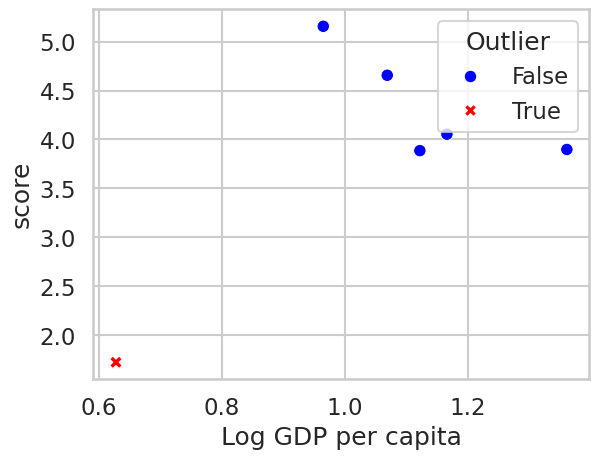

In [ ]:
# returns error if we put variable direct cause from previous code section it does not calculates as booleen value
south_asian_data['Outlier'] = (
    ((south_asian_data['Log GDP per capita'] < lower_bound_gdp) | (south_asian_data['Log GDP per capita'] > upper_bound_gdp)) |
    ((south_asian_data['score'] < lower_bound_score) | (south_asian_data['score'] > upper_bound_score))
)


sns.scatterplot(
    data=south_asian_data,
    x='Log GDP per capita',
    y='score',
    hue='Outlier',  # this parameter is used to group data points, allows to distinguish categories.
    palette={True: 'red', False: 'blue'}, # controls color
    style='Outlier', # to change the marker accordingly
    markers={True: 'X', False: 'o'},
    legend='full'  # used to make a plot more incformative
)
sns.set_context("talk")
sns.set_style("whitegrid")


4. Discuss the characteristics of these outliers and their potential impact on regional averages.

In the given scatterplot, it is shown that. There is only one outlier and the bottom. It suggests that regional means are less than expected.
There characteristics is lower bound outlier.

**Task-4-Exploring trends across metrics**

1. Choose two metrics (e.g., Freedom to Make Life Choices and Generosity) and calculate their correlation
{pearson correlation} with the Score for South Asian countries.

In [ ]:
# .corr() method computes the correlation coeddicient between two  columns
# pearson
correlation_freedom = south_asian_data['Freedom to make life choices'].corr(south_asian_data[ 'score'], method='pearson')
correlation_generosity = south_asian_data['Generosity'].corr(south_asian_data['score'], method='pearson')

print(f"The Pearson correlation between Freedom to make life choices and Score: {correlation_freedom}")
print(f"The Pearson correlation between Generosity and Score: {correlation_generosity}")

The Pearson correlation between Freedom to make life choices and Score: 0.8005185224163315
The Pearson correlation between Generosity and Score: 0.874512371253192


2. Create scatter plots with trendlines for these metrics against the Score.

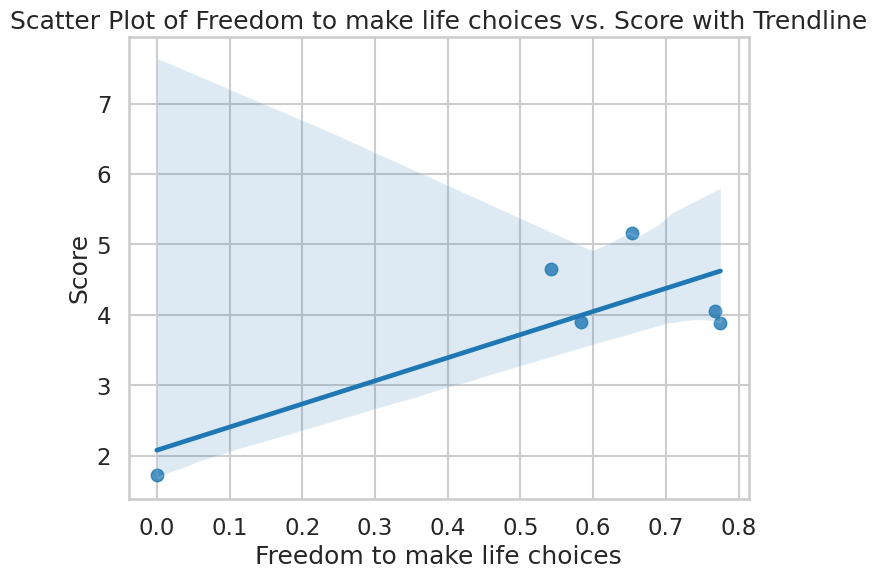

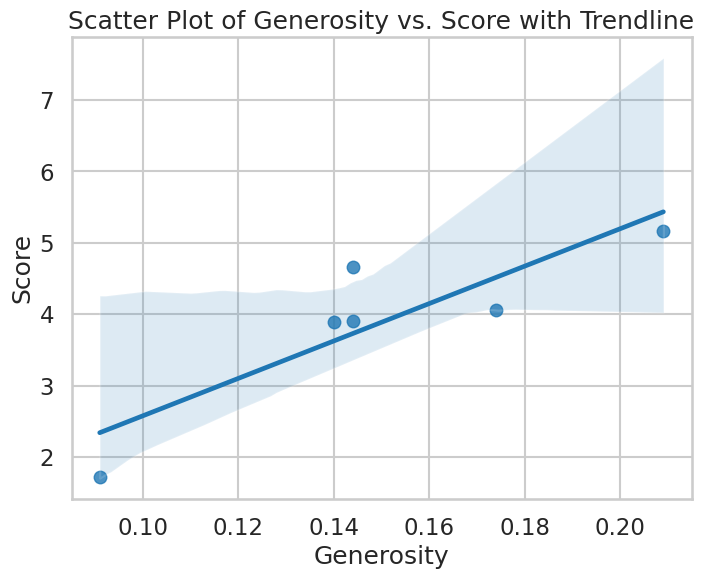

In [ ]:
metrics = ['Freedom to make life choices', 'Generosity'] # variable to analyze in relation

#here first goes first element and after finish goes second element
for metric in metrics:
    plt.figure(figsize=(8, 6))
    sns.regplot(x=metric, y='score', data=south_asian_data) #creates scatterplot of selected metric
    plt.title(f'Scatter Plot of {metric} vs. Score with Trendline')
    plt.xlabel(metric)
    plt.ylabel('Score')
    plt.show()

3. Identify and discuss the strongest and weakest relationships between these metrics and the Score for
South Asian countries.

The strong relationship between metrics and score is generosity and score where the Pearson correlation is 0.08745 as the higher level of generosity is closely associated with happiness score. The scatter plot visually supports this statement by showing a upward trend which tries to imply that when generosity increases, so does the score.

The weak relationship between metrics and score is freedom to make life choices and score where its Pearson correlation is 0.8005. It is also a strong and positive relation but as shown, it is little weak if we compare it with generosity. The scatter plot here shows the upward trend which indicates the happiness score increases when freedom to make life choice increases. But as compared to generosity the contribution is little low.


**Task-5-Gap Analysis**

1. Add a new column, GDP-Score Gap, which is the difference between GDP per Capita and the Score
for each South Asian country.

In [ ]:
south_asian_data['GDP-Score Gap'] = south_asian_data['Log GDP per capita'] - south_asian_data['score']
print(south_asian_data.head())

  Country name  score  Log GDP per capita  Social support  \
0        Nepal  5.158               0.965           0.990   
1     Pakistan  4.657               1.069           0.600   
2        India  4.054               1.166           0.653   
3    Sri Lanka  3.898               1.361           1.179   
4   Bangladesh  3.886               1.122           0.249   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.443                         0.653       0.209   
1                    0.321                         0.542       0.144   
2                    0.417                         0.767       0.174   
3                    0.586                         0.583       0.144   
4                    0.513                         0.775       0.140   

   Perceptions of corruption  Dystopia + residual Happiness Category  Outlier  \
0                      0.115                1.783             Medium    False   
1                      0.074          

2. Rank the South Asia countries by this gap in both ascending and descending order.

In [ ]:
ascending_rank = south_asian_data.sort_values(by='GDP-Score Gap', ascending=True) # arranges item according to condition
print("Ascending order ranking by GDP-Score Gap:")
print(ascending_rank[['Country name', 'GDP-Score Gap']])


descending_rank = south_asian_data.sort_values(by='GDP-Score Gap', ascending=False)
print("\nDescending order ranking by GDP-Score Gap:")
print(descending_rank[['Country name', 'GDP-Score Gap']])

Ascending order ranking by GDP-Score Gap:
  Country name  GDP-Score Gap
0        Nepal         -4.193
1     Pakistan         -3.588
2        India         -2.888
4   Bangladesh         -2.764
3    Sri Lanka         -2.537
5  Afghanistan         -1.093

Descending order ranking by GDP-Score Gap:
  Country name  GDP-Score Gap
5  Afghanistan         -1.093
3    Sri Lanka         -2.537
4   Bangladesh         -2.764
2        India         -2.888
1     Pakistan         -3.588
0        Nepal         -4.193


3. Highlight the top 3 countries with the largest positive and negative gaps using a bar chart.

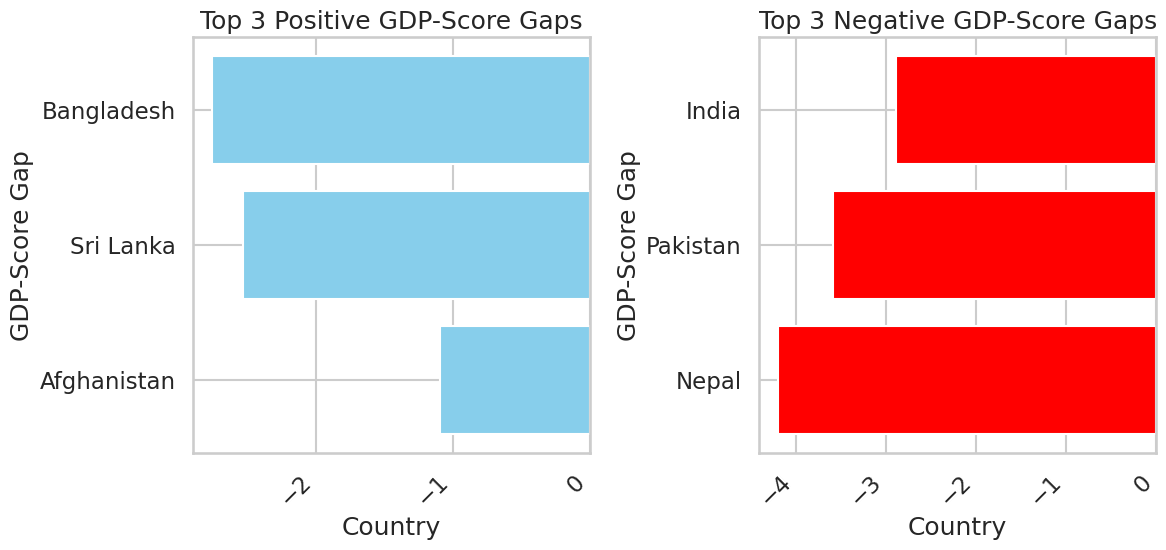

In [ ]:
top_3_positive = descending_rank.head(3)

top_3_negative = ascending_rank.head(3)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
plt.barh(top_3_positive['Country name'], top_3_positive['GDP-Score Gap'], color='skyblue')
plt.xlabel('Country')
plt.ylabel('GDP-Score Gap')
plt.title('Top 3 Positive GDP-Score Gaps')
plt.xticks(rotation=45, ha='right') # modifies appearence


# Plotting negative gaps
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
plt.barh(top_3_negative['Country name'], top_3_negative['GDP-Score Gap'], color='red')
plt.xlabel('Country')
plt.ylabel('GDP-Score Gap')
plt.title('Top 3 Negative GDP-Score Gaps')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

4. Analyze the reasons behind these gaps and their implications for South Asian countries.

The first bar graph show the top 3 countries with positive GDP-Scores gap and second graph shows top 3 negative scores gap.
Afghanistan’s actual score is below the predicted value indicating closer alignment whereas Sri lanka score is lower than expected showing moderate discrepancy and Bangladesh score is alsoe lower than expected indicating significant negative deviation.
Nepal’s score is lower than expected indicating a large negative deviation, and also Pakistan’s score is lower which shows discrepancy. At last India, also have lower score.


# **Problem-3- Comparetively Analysis**

**Task-1-SetUp task- Preparing the middle eastern Dataset**

1. Similar in Task - 1 of Problem 2 create a dataframe from middle eastern countries. For hint use the
following list:
middle east countries = [ "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
"Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"]

In [ ]:
middle_east_countries = ["Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"]
middle_east_data = file[file['Country name'].isin(middle_east_countries)].copy()
print(middle_east_data.head())

            Country name  score  Log GDP per capita  Social support  \
4                 Israel  7.341               1.803           1.513   
12                Kuwait  6.951               1.845           1.364   
21  United Arab Emirates  6.733               1.983           1.164   
27          Saudi Arabia  6.594               1.842           1.361   
61               Bahrain  5.959                 NaN             NaN   

    Healthy life expectancy  Freedom to make life choices  Generosity  \
4                     0.740                         0.641       0.153   
12                    0.661                         0.827       0.200   
21                    0.563                         0.815       0.209   
27                    0.511                         0.787       0.114   
61                      NaN                           NaN         NaN   

    Perceptions of corruption  Dystopia + residual Happiness Category  
4                       0.193                2.298            

**1. Descriptive Statistics**

Calculate the mean, Standard deviation of the score for both South Asia and middle east.

In [ ]:
south_asia_mean_score = south_asian_data['score'].mean()
south_asia_std_score = south_asian_data['score'].std()

middle_east_mean_score = middle_east_data['score'].mean()
middle_east_std_score = middle_east_data['score'].std()

print(f"The mean score of south asia = {south_asia_mean_score}, Standard Deviation = {south_asia_std_score}")
print(f"The mean score of middle east = {middle_east_mean_score}, Standard Deviation = {middle_east_std_score}")

The mean score of south asia = 3.895666666666667, Standard Deviation = 1.1770690152521504
The mean score of middle east = 5.412100000000001, Standard Deviation = 1.5662011684327144


WHich region has higher happiness scores on average.

In [ ]:
if south_asia_mean_score > middle_east_mean_score:
  print("South Asia has higher average happiness scores.")
elif middle_east_mean_score > south_asia_mean_score:
  print("Middle East has higher average happiness scores.")
else:
  print("Both regions have the same average happiness score.")

Middle East has higher average happiness scores.


**Top and Bottom performers**

Identify the top 3 and bottom 3 countries in each region based on the score.

In [ ]:
# Top 3 countries in South Asia
top3_south_asia = south_asian_data.sort_values(by='score', ascending=False).head(3)
print("Top 3 happiest countries in South Asia:")
print(top3_south_asia[['Country name', 'score']])

# Bottom 3 countries in South Asia
bottom3_south_asia = south_asian_data.sort_values(by='score', ascending=True).head(3)
print("\nBottom 3 happiest countries in South Asia:")
print(bottom3_south_asia[['Country name', 'score']])

# Top 3 countries in Middle East
top3_middle_east = middle_east_data.sort_values(by='score', ascending=False).head(3)
print("\nTop 3 happiest countries in Middle East:")
print(top3_middle_east[['Country name', 'score']])

# Bottom 3 countries in Middle East
bottom3_middle_east = middle_east_data.sort_values(by='score', ascending=True).head(3)
print("\nBottom 3 happiest countries in Middle East:")
print(bottom3_middle_east[['Country name', 'score']])

Top 3 happiest countries in South Asia:
  Country name  score
0        Nepal  5.158
1     Pakistan  4.657
2        India  4.054

Bottom 3 happiest countries in South Asia:
  Country name  score
5  Afghanistan  1.721
4   Bangladesh  3.886
3    Sri Lanka  3.898

Top 3 happiest countries in Middle East:
            Country name  score
4                 Israel  7.341
12                Kuwait  6.951
21  United Arab Emirates  6.733

Bottom 3 happiest countries in Middle East:
    Country name  score
141      Lebanon  2.707
132        Yemen  3.561
124       Jordan  4.186


Plot bar charts comparing these charts.

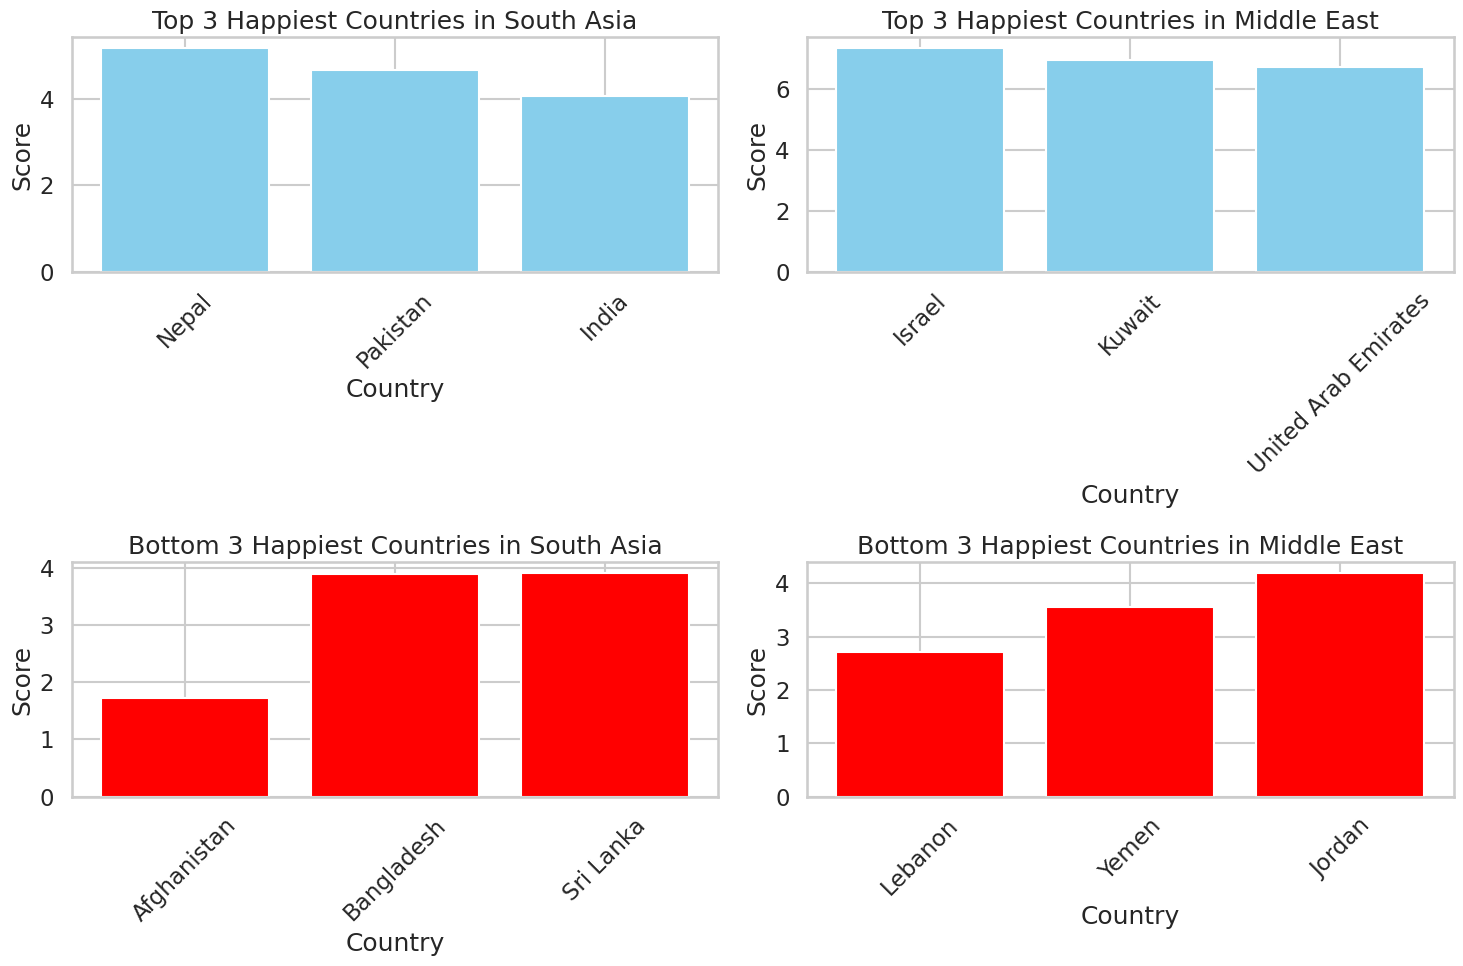

In [ ]:
regions = ['South Asia', 'Middle East']
top_performers = [top3_south_asia, top3_middle_east]
bottom_performers = [bottom3_south_asia, bottom3_middle_east]

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

for i, region in enumerate(regions):
    axes[0, i].bar(top_performers[i]['Country name'], top_performers[i]['score'], color='skyblue')
    axes[0, i].set_title(f'Top 3 Happiest Countries in {region}')
    axes[0, i].set_xlabel('Country')
    axes[0, i].set_ylabel('Score')
    axes[0, i].tick_params(axis='x', rotation=45)

    axes[1, i].bar(bottom_performers[i]['Country name'], bottom_performers[i]['score'], color='red')
    axes[1, i].set_title(f'Bottom 3 Happiest Countries in {region}')
    axes[1, i].set_xlabel('Country')
    axes[1, i].set_ylabel('Score')
    axes[1, i].tick_params(axis='x', rotation=45)


plt.tight_layout()
plt.show()

**Metric Comparisons**

Compare key metrics like GDP per Capita, Social Support, and Healthy Life Expectancy
between the regions using grouped bar charts.

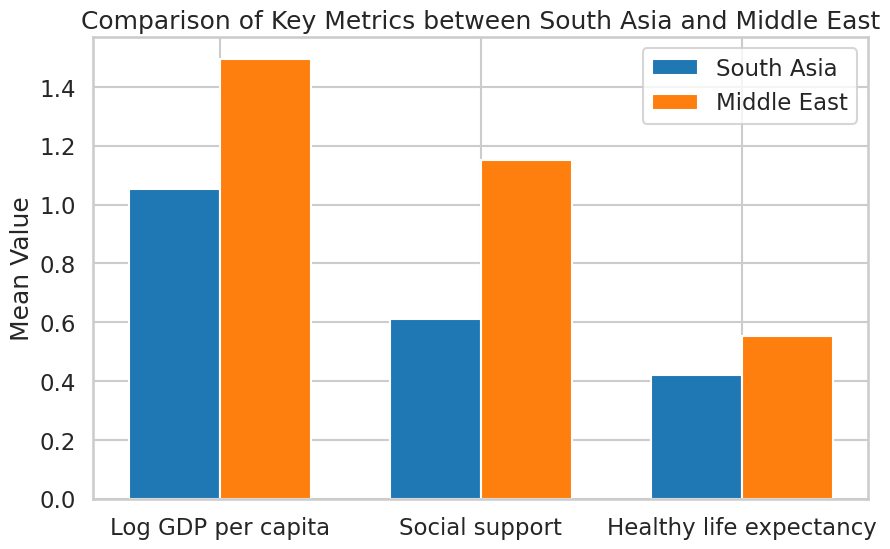

In [ ]:
metrics = ['Log GDP per capita', 'Social support', 'Healthy life expectancy']

south_asia_means = south_asian_data[metrics].mean()
middle_east_means = middle_east_data[metrics].mean()

# Create the grouped bar chart
x = range(len(metrics))
width = 0.35  # Adjust the width of the bars as needed


fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar([i - width/2 for i in x], south_asia_means, width, label='South Asia')
rects2 = ax.bar([i + width/2 for i in x], middle_east_means, width, label='Middle East')

# Add labels, title, and legend
ax.set_ylabel('Mean Value')
ax.set_title('Comparison of Key Metrics between South Asia and Middle East')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()


plt.show()

Which metrics show the largest disparity between the two regions?

Social support                  0.540944
Log GDP per capita              0.444500
Healthy life expectancy         0.133778
Perceptions of corruption       0.046389
Generosity                      0.010444
Freedom to make life choices    0.001000
dtype: float64


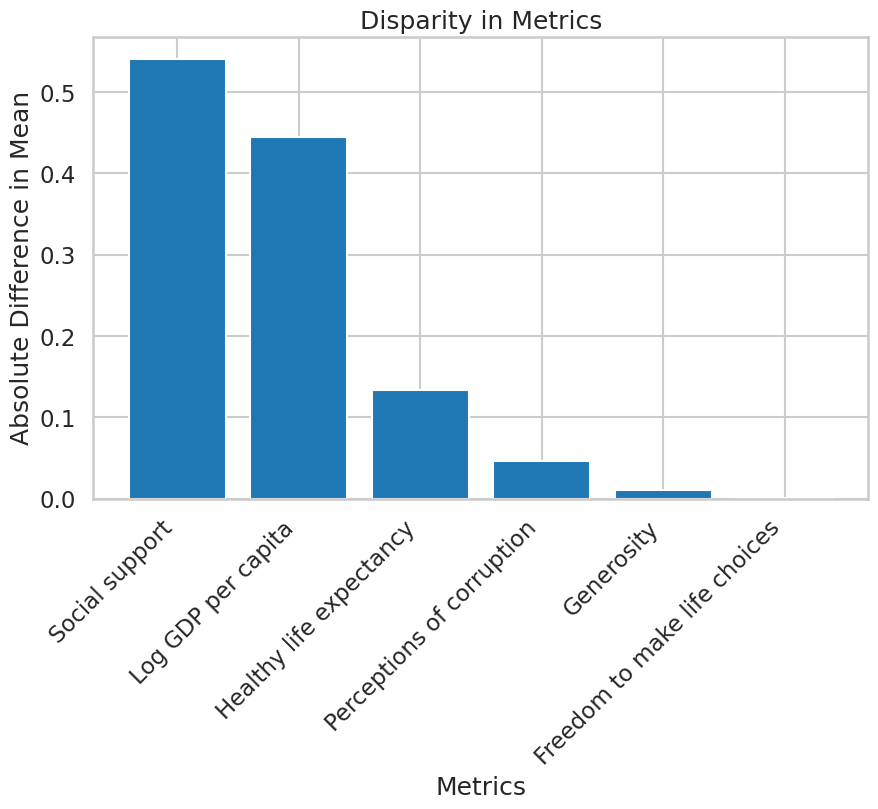

In [ ]:

metrics = ['Log GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

south_asia_means = south_asian_data[metrics].mean()
middle_east_means = middle_east_data[metrics].mean()

disparities = abs(south_asia_means - middle_east_means)

# Identify the metrics with the largest disparities
largest_disparities = disparities.sort_values(ascending=False)

print(largest_disparities)

# Plot the disparities for better visualization
plt.figure(figsize=(10, 6))
plt.bar(largest_disparities.index, largest_disparities.values)
plt.xlabel("Metrics")
plt.ylabel("Absolute Difference in Mean")
plt.title("Disparity in Metrics")
plt.xticks(rotation=45, ha='right')
plt.show()

**Happiness disparity**

Compute the range (max - min) and coefficient of variation (CV) for Score in both regions.

In [ ]:
south_asia_range = south_asian_data['score'].max() - south_asian_data['score'].min()
south_asia_cv = south_asian_data['score'].std() / south_asian_data['score'].mean()

middle_east_range = middle_east_data['score'].max() - middle_east_data['score'].min()
middle_east_cv = middle_east_data['score'].std() / middle_east_data['score'].mean()

print(f"The range of south asia is: {south_asia_range}, CV = {south_asia_cv}")
print(f"The range of middle east is: {middle_east_range}, CV = {middle_east_cv}")

The range of south asia is: 3.4370000000000003, CV = 0.3021482883337427
The range of middle east is: 4.634, CV = 0.28938880812119405


Which region has greater variability in happiness?

In [ ]:
if south_asia_cv > middle_east_cv:
  print("South Asia has greater variability in happiness.")
elif middle_east_cv > south_asia_cv:
  print("Middle East has greater variability in happiness.")
else:
  print("Both regions have the same variability in happiness.")

South Asia has greater variability in happiness.


**Correlation Analysis**

Analyze the correlation of Score with other metrics Freedom to Make Life Choices, and
Generosity within each region.

The correlation between Freedom to make life choices and Score in south Asia is: 0.8005185224163315
The correlation between Generosity and Score in south Asia is: 0.874512371253192
The correlation between Freedom to make life choices and Score in middle east: 0.8632202433827543
The correlation between Generosity and Score in middle east: 0.6275236536964182


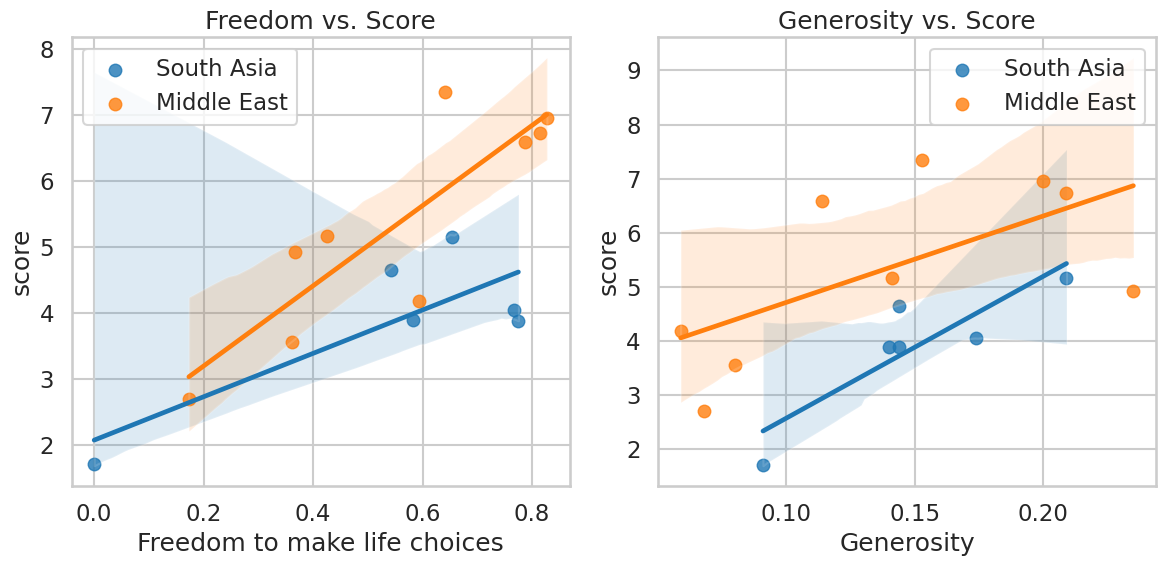

In [ ]:
correlation_freedom_sa = south_asian_data['Freedom to make life choices'].corr(south_asian_data['score'], method='pearson')
correlation_generosity_sa = south_asian_data['Generosity'].corr(south_asian_data['score'], method='pearson')

print(f"The correlation between Freedom to make life choices and Score in south Asia is: {correlation_freedom_sa}")
print(f"The correlation between Generosity and Score in south Asia is: {correlation_generosity_sa}")

correlation_freedom_me = middle_east_data['Freedom to make life choices'].corr(middle_east_data['score'], method='pearson')
correlation_generosity_me = middle_east_data['Generosity'].corr(middle_east_data['score'], method='pearson')

print(f"The correlation between Freedom to make life choices and Score in middle east: {correlation_freedom_me}")
print(f"The correlation between Generosity and Score in middle east: {correlation_generosity_me}")


plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
sns.regplot(x='Freedom to make life choices', y='score', data=south_asian_data, label="South Asia")
sns.regplot(x='Freedom to make life choices', y='score', data=middle_east_data, label="Middle East")
plt.title('Freedom vs. Score')
plt.legend()


plt.subplot(1, 2, 2)
sns.regplot(x='Generosity', y='score', data=south_asian_data, label="South Asia")
sns.regplot(x='Generosity', y='score', data=middle_east_data, label="Middle East")
plt.title('Generosity vs. Score')
plt.legend()

plt.tight_layout()
plt.show()

**Outlier detection**

Identify outlier countries in both regions based on Score and GDP per Capita.

In [ ]:
Q1_score_me = middle_east_data['score'].quantile(0.25)
Q3_score_me = middle_east_data['score'].quantile(0.75)
IQR_score_me = Q3_score_me - Q1_score_me
lower_bound_score_me = Q1_score_me - 1.5 * IQR_score_me
upper_bound_score_me = Q3_score_me + 1.5 * IQR_score_me

outliers_score_me = middle_east_data[
    (middle_east_data['score'] < lower_bound_score_me) | (middle_east_data['score'] > upper_bound_score_me)
]

Q1_gdp_me = middle_east_data['Log GDP per capita'].quantile(0.25)
Q3_gdp_me = middle_east_data['Log GDP per capita'].quantile(0.75)
IQR_gdp_me = Q3_gdp_me - Q1_gdp_me
lower_bound_gdp_me = Q1_gdp_me - 1.5 * IQR_gdp_me
upper_bound_gdp_me = Q3_gdp_me + 1.5 * IQR_gdp_me

outliers_gdp_me = middle_east_data[
    (middle_east_data['Log GDP per capita'] < lower_bound_gdp_me) | (middle_east_data['Log GDP per capita'] > upper_bound_gdp_me)
]

outlier_countries_me = pd.concat([outliers_score_me, outliers_gdp_me]).drop_duplicates()

#Automatically eveluates on based on booleen value waht to print
if outlier_countries_me.empty: # directly return true or false
    print("There are no outlier countries in the Middle East based on Score and GDP per Capita.")
else:
    print("The outlier countries in Middle East based on Score and GDP per Capita:")
    print(outlier_countries_me[['Country name', 'score', 'Log GDP per capita']])


# Combine outlier dataframes for both regions
all_outliers = pd.concat([outlier_countries, outlier_countries_me]).drop_duplicates()

if all_outliers.empty:
    print("\nThere are no outlier countries in South Asia or Middle East based on Score and GDP per Capita.")
else:
    print("\nAll Outlier Countries in South Asia and Middle East:")
    print(all_outliers[['Country name', 'score', 'Log GDP per capita']])

There are no outlier countries in the Middle East based on Score and GDP per Capita.

All Outlier Countries in South Asia and Middle East:
  Country name  score  Log GDP per capita
5  Afghanistan  1.721               0.628


Plot these outliers and discuss their implications.

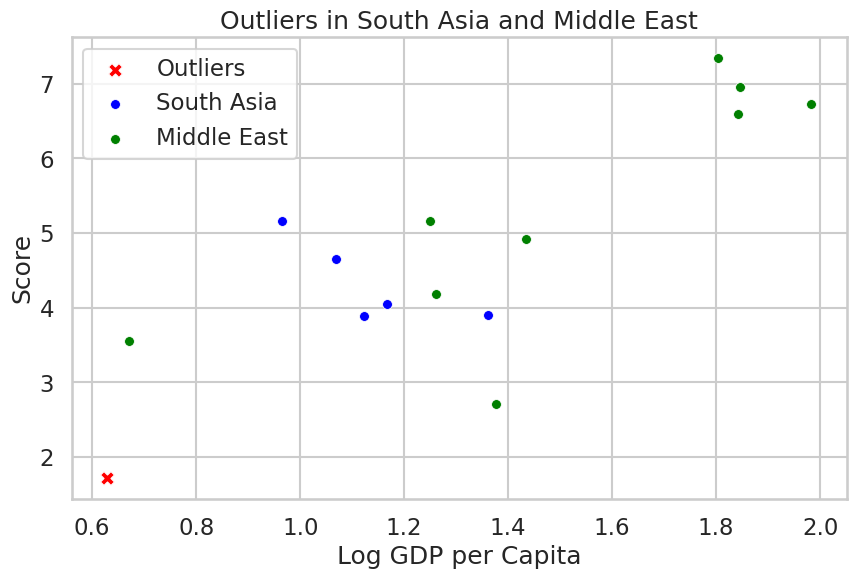

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=all_outliers, x='Log GDP per capita', y='score', color='red', marker='X', s=100)
sns.scatterplot(data=south_asian_data[~south_asian_data['Country name'].isin(all_outliers['Country name'])], x='Log GDP per capita', y='score', color='blue', marker='o', s=50)
sns.scatterplot(data=middle_east_data[~middle_east_data['Country name'].isin(all_outliers['Country name'])], x='Log GDP per capita', y='score', color='green', marker='o', s=50)

plt.xlabel('Log GDP per Capita')
plt.ylabel('Score')
plt.title('Outliers in South Asia and Middle East')
plt.legend(labels=['Outliers', 'South Asia', 'Middle East'])
plt.show()

**Visualization**

Create boxplots comparing the distribution of Score between South Asia and the Middle East.

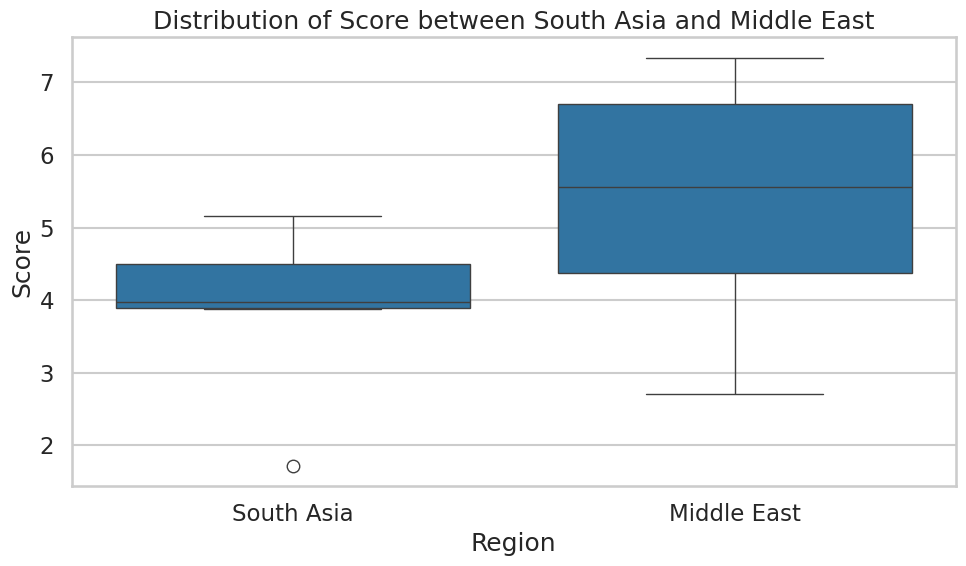

In [ ]:
south_asian_data['Region'] = 'South Asia'
middle_east_data['Region'] = 'Middle East'

combined_data = pd.concat([south_asian_data[['score', 'Region']], middle_east_data[['score', 'Region']]], ignore_index=True)

plt.figure(figsize=(10, 6))

sns.boxplot(x='Region', y='score', data=combined_data)

plt.title('Distribution of Score between South Asia and Middle East')
plt.xlabel('Region')
plt.ylabel('Score')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()


Interpret the key differences in distribution shapes, medians, and outliers.

Distribution shape:
The box plot in south Asia is narrow than in middle east meaning south Asia have less variability in scores than middle east. The IQR of south Asia is smaller than of middle east meaning there are most countries having similar or close scores and middle east having large IQR means great diversity in scores.

Median:
The median score of South Asia is around 4.5, meaning half countries have below score and half countries have high score. As for Middle east, the median score is around 5.5 indicating most countries have higher scores.

Outliers:
In south Asia, there is one country which is outlier, that results in Afghanistan does not have score and GDP per capita as per the expected range whereas, in middle east every country has meet the expected range.
